In [1]:
    import pandas as pd
    from sklearn.model_selection import train_test_split
    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.linear_model import LogisticRegression
    from wordcloud import WordCloud
    import matplotlib.pyplot as plt
    import seaborn as sns
    from nltk import tokenize
    import nltk


In [2]:
resenha = pd.read_csv("c:/imdb-reviews-pt-br.csv")

treino, teste, classe_treino, classe_teste, = train_test_split(resenha.text_pt,
resenha.sentiment, random_state = 42)

classificacao = resenha["sentiment"].replace(['neg','pos'], [0, 1])
resenha["classificacao"] = classificacao

texto = ["Assisti um filme [ótimo", "Assisti um filme ruim"]

vetorizar = CountVectorizer(lowercase=False)
bag_of_words = vetorizar.fit_transform(texto)  # Vetorizando todos os comentários e vetorizando-os.
bag_of_words

vetorizar = CountVectorizer(lowercase = False, max_features = 50)
bag_of_words = vetorizar.fit_transform(resenha.text_pt)
print(bag_of_words.shape)

def Classificar_texto(texto, coluna_texto, coluna_classificacao):
    vetorizar = CountVectorizer(lowercase = False, max_features = 50)
    bag_of_words = vetorizar.fit_transform(texto[coluna_texto])

    treino, teste, classe_treino, classe_teste, = train_test_split(bag_of_words,
    texto[coluna_classificacao], random_state = 42)

    regressao_logistica = LogisticRegression()
    regressao_logistica.fit(treino, classe_treino)
    return regressao_logistica.score(teste, classe_teste)
print(Classificar_texto(resenha, "text_pt", "classificacao"))

todas_palavras = ' '.join([texto for texto in resenha.text_pt])

nuvem_palavras = WordCloud().generate(todas_palavras)

def nuvem_palavras_neg(texto, coluna_texto):
    texto_negativo = texto.query("sentiment == 'neg'")    
    todas_palavras = ' '.join([texto for texto in texto_negativo[coluna_texto]])

    nuvem_palavras = WordCloud(width = 800, height = 500,
    max_font_size = 110, collocations = False).generate(todas_palavras)

    plt.figure(figsize = (10, 7))
    plt.imshow(nuvem_palavras, interpolation = 'bilinear')
    plt.axis("off")
    plt.show()
    
def nuvem_palavras_pos(texto, coluna_texto):
    texto_positivo = texto.query("sentiment == 'pos'")    
    todas_palavras = ' '.join([texto for texto in texto_positivo[coluna_texto]])

    nuvem_palavras = WordCloud(width = 800, height = 500,
    max_font_size = 110, collocations = False).generate(todas_palavras)

    plt.figure(figsize = (10, 7))
    plt.imshow(nuvem_palavras, interpolation = 'bilinear')
    plt.axis("off")
    plt.show()

(49459, 50)
0.6583097452486858


In [31]:
frase = 'Bem vindo ao mundo do PLN!'

token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(frase)
print(token_frase)

['Bem', 'vindo', 'ao', 'mundo', 'do', 'PLN!']


In [32]:
def pareto(texto, coluna_texto, quantidade):
    todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
    token_frase = token_espaco.tokenize(todas_palavras)
    frequencia = nltk.FreqDist(token_frase)
    df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                "Frequência": list(frequencia.values())})

    df_frequencia = df_frequencia.nlargest(columns = "Frequência", n = quantidade)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequencia, x = "Palavra", y = "Frequência", color = 'gray')
    ax.set(ylabel = "Contagem")
    plt.show()

palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")

In [33]:
frase_processada = list()
for opniao in resenha.text_pt:  # Tratamento de dados, fazendo um acesso de cada linha dentro da resenha.
    nova_frase = list()         # Removendo os stop words
    palavras_texto = token_espaco.tokenize(opniao)
    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

resenha["tratamento_1"] = frase_processada

In [6]:
def pareto(texto, coluna_texto, quantidade):
    todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
    token_frase = token_espaco.tokenize(todas_palavras)
    frequencia = nltk.FreqDist(token_frase)
    df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                "Frequência": list(frequencia.values())})

    df_frequencia = df_frequencia.nlargest(columns = "Frequência", n = quantidade)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequencia, x = "Palavra", y = "Frequência", color = 'gray')
    ax.set(ylabel = "Contagem")
    plt.show()

## StopWords além dos textos

Os stopwords também não necessariamente se restringem à lista que vimos no curso anterior, você pode criar as suas stopwords dependendo do seu projeto e de como você quer aplicar a sua classificação de sentimentos.

Stop words (ou palavras de parada – tradução livre) são palavras que podem ser consideradas "irrelevantes" para um conjunto de texto. Os stop words geralmente inclue preposições e artigos, mas não são um conjunto fechado de palavras, você pode adicionar ou remover conforme sua necessidade.

## Comparando pareto, com wordcloud

* CountVectorizer = Retira automaticamente, pontos, virgulas, caracteres espéciais e pontuações

## O que aprendemos nesta aula:

* O conceito de tokenização por pontuação.

* Como usar a biblioteca NLTK para realizar a tokenização por pontuação.

* Como analisar a word cloud e pareto, os comparando

## Separando pontuação das palavras

In [7]:
from nltk import tokenize

frase = "olá Mundo!"
token_pontuacao = tokenize.WordPunctTokenizer()
token_Frase = token_pontuacao.tokenize(frase)

print(token_Frase)


['olá', 'Mundo', '!']


## Explorando a tokenização

In [8]:
frase = "Os cursos da Alura são ótimos, além de ótimos, têm alunos ótimos!"
token_espaco = tokenize.WhitespaceTokenizer()
token_pontuacao = tokenize.WordPunctTokenizer()

token_1 = token_espaco.tokenize(frase)
token_2 = token_pontuacao.tokenize(frase)

print(token_1)
print(token_2)


# WordPunctTokenizer(); Comparando as saídas dos diferentes algoritmos o mais adequado a se escolher é o WordPunctTokenizer, visto que na primeira opção de método a palavra “ótimos” tem duas variações (“ótimos,”, “ótimos!”) e no segundo método há somente uma variação da mesma palavra.

['Os', 'cursos', 'da', 'Alura', 'são', 'ótimos,', 'além', 'de', 'ótimos,', 'têm', 'alunos', 'ótimos!']
['Os', 'cursos', 'da', 'Alura', 'são', 'ótimos', ',', 'além', 'de', 'ótimos', ',', 'têm', 'alunos', 'ótimos', '!']


In [9]:
from string import punctuation

pontuacao = list()
for ponto in punctuation:
    pontuacao.append(ponto)

print(pontuacao)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


In [10]:
pontuacao_stopwords = pontuacao + palavras_irrelevantes

frase_processada = list()
for opniao in resenha["tratamento_1"]: # lista já tratada não contém os StopWords, então a menas interações na hora da Verificação.
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opniao)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

resenha["tratamento_2"] = frase_processada

In [11]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1,tratamento_2
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...


In [12]:
resenha["tratamento_1"][0]

'Mais vez, Sr. Costner arrumou filme tempo necessário. Além terríveis seqüências resgate mar, quais poucas, simplesmente importei nenhum personagens. A maioria fantasmas armário, personagem Costers realizado logo início, esquecido tarde, importava. O personagem deveríamos importar arrogante superconfiante, Ashton Kutcher. O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armário desordenado. Seu único obstáculo parece estar vencendo Costner. Finalmente, bem além meio caminho, Costner conta sobre fantasmas Kutchers. Somos informados Kutcher levado ser melhor pressentimentos presságios anteriores. Nenhuma mágica aqui, tudo podia fazer desligar hora.'

In [13]:
resenha["tratamento_2"][0]

'Mais vez Sr Costner arrumou filme tempo necessário Além terríveis seqüências resgate mar quais poucas simplesmente importei nenhum personagens A maioria fantasmas armário personagem Costers realizado logo início esquecido tarde importava O personagem deveríamos importar arrogante superconfiante Ashton Kutcher O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armário desordenado Seu único obstáculo parece estar vencendo Costner Finalmente bem além meio caminho Costner conta sobre fantasmas Kutchers Somos informados Kutcher levado ser melhor pressentimentos presságios anteriores Nenhuma mágica aqui tudo podia fazer desligar hora'

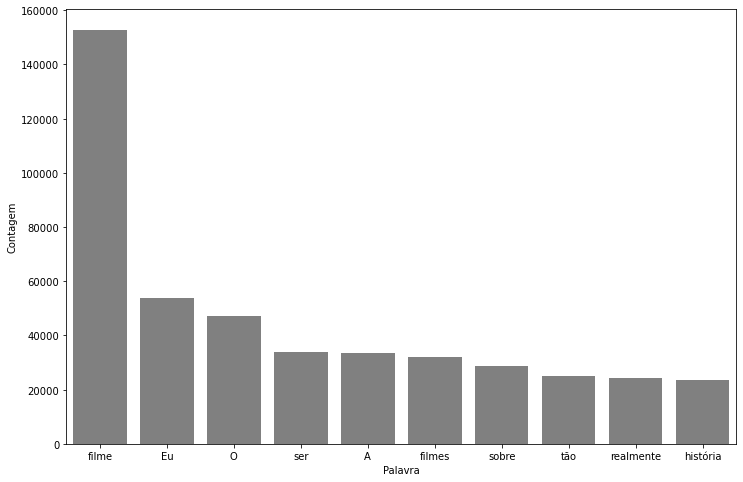

In [14]:
pareto(resenha, "tratamento_2", 10)

é necessário retirar a pontuação, pois mesmo usando o CountVectorizer para realizar a representação em Bag of Words, nós criamos a função pareto, que por sua vez não remove a pontuação automaticamente. Portanto, para que o pareto represente a frequência das palavras, o mais próximo possível da frequência da representação Bag of W\ords é importante remover as pontuações do nosso corpus.

## O que aprendemos nesta aula:

* A alterar a lista de stop words.

* A realizar o tratamento para remover pontuação de um texto.

# Retirando acentuação

In [15]:
!pip install unidecode

In [16]:
import unidecode

acentos = "ótimo péssimo não é tão"

teste = unidecode.unidecode(acentos)
print(teste)

otimo pessimo nao e tao


In [17]:
sem_acentos = [unidecode.unidecode(texto) for texto in resenha["tratamento_2"]]

In [18]:
sem_acentos[0]

'Mais vez Sr Costner arrumou filme tempo necessario Alem terriveis sequencias resgate mar quais poucas simplesmente importei nenhum personagens A maioria fantasmas armario personagem Costers realizado logo inicio esquecido tarde importava O personagem deveriamos importar arrogante superconfiante Ashton Kutcher O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armario desordenado Seu unico obstaculo parece estar vencendo Costner Finalmente bem alem meio caminho Costner conta sobre fantasmas Kutchers Somos informados Kutcher levado ser melhor pressentimentos pressagios anteriores Nenhuma magica aqui tudo podia fazer desligar hora'

In [19]:
stopwords_sem_acentos =  [unidecode.unidecode(texto) for texto in pontuacao_stopwords]

In [20]:
print(stopwords_sem_acentos)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', 'de', 'a', 'o', 'que', 'e', 'e', 'do', 'da', 'em', 'um', 'para', 'com', 'nao', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'a', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'ja', 'eu', 'tambem', 'so', 'pelo', 'pela', 'ate', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'voce', 'essa', 'num', 'nem', 'suas', 'meu', 'as', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nos', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'voces', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'esta', 'estamos', 'estao', 'estive', 'esteve', 'estivemos', 'estive

In [21]:
resenha["tratamento_3"] = sem_acentos

frase_processada = list()
for opniao in resenha["tratamento_3"]: # lista já tratada não contém os StopWords, então a menas interações na hora da Verificação.
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opniao)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

resenha["tratamento_3"] = frase_processada

In [22]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1,tratamento_2,tratamento_3
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...,Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes acao mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...,Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever musicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...,Filmes fotos latao palavra apropriada verdade ...


In [23]:
acuracia_tratamento3 = Classificar_texto(resenha, "tratamento_3", "classificacao")
print(acuracia_tratamento3)

0.6810351799433886


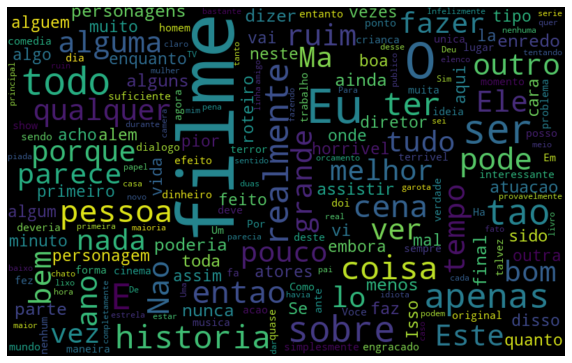

In [24]:
nuvem_palavras_neg(resenha, "tratamento_3")

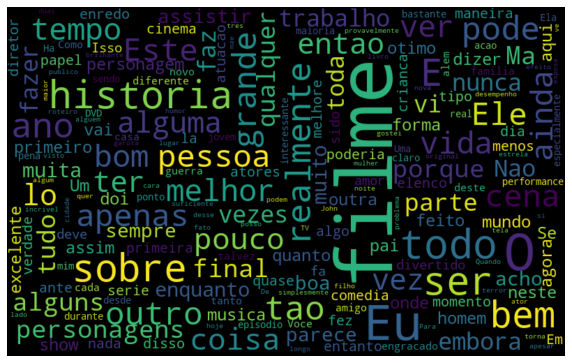

In [25]:
nuvem_palavras_pos(resenha, "tratamento_3")

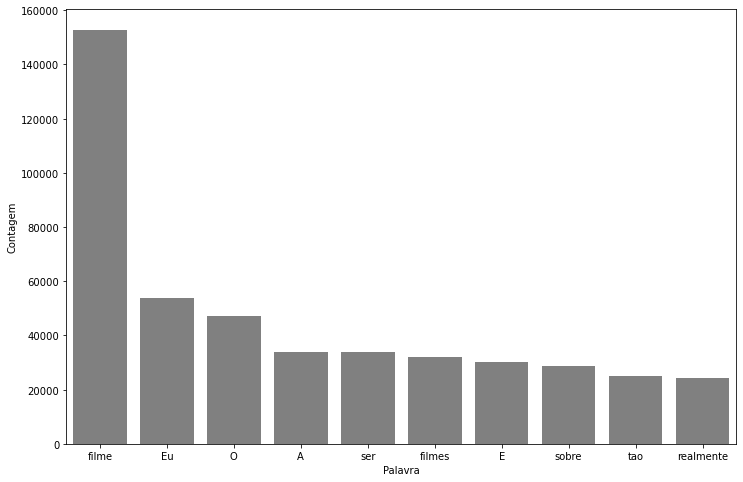

In [26]:
pareto(resenha, "tratamento_3", 10)

## Transformando em minúsculo

In [27]:
frase = "O Michael é o novo estágiario da Compasso UOL"
print(frase.lower()) # .lower = deixa toda minha frase sem letras maiúscula.

o michael é o novo estágiario da compasso uol


In [28]:
frase_processada = list()
for opniao in resenha["tratamento_3"]:
    nova_frase = list()
    opniao = opniao.lower()
    palavras_texto = token_pontuacao.tokenize(opniao)
    for palavra in palavras_texto:
        if palavra not in stopwords_sem_acentos:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

resenha["tratamento_4"] = frase_processada

In [29]:
resenha["text_pt"][0]

'Mais uma vez, o Sr. Costner arrumou um filme por muito mais tempo do que o necessário. Além das terríveis seqüências de resgate no mar, das quais há muito poucas, eu simplesmente não me importei com nenhum dos personagens. A maioria de nós tem fantasmas no armário, e o personagem Costers é realizado logo no início, e depois esquecido até muito mais tarde, quando eu não me importava. O personagem com o qual deveríamos nos importar é muito arrogante e superconfiante, Ashton Kutcher. O problema é que ele sai como um garoto que pensa que é melhor do que qualquer outra pessoa ao seu redor e não mostra sinais de um armário desordenado. Seu único obstáculo parece estar vencendo Costner. Finalmente, quando estamos bem além do meio do caminho, Costner nos conta sobre os fantasmas dos Kutchers. Somos informados de por que Kutcher é levado a ser o melhor sem pressentimentos ou presságios anteriores. Nenhuma mágica aqui, era tudo que eu podia fazer para não desligar uma hora.'

In [30]:
resenha["tratamento_4"][0]

'vez sr costner arrumou filme tempo necessario alem terriveis sequencias resgate mar quais poucas simplesmente importei nenhum personagens maioria fantasmas armario personagem costers realizado logo inicio esquecido tarde importava personagem deveriamos importar arrogante superconfiante ashton kutcher problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armario desordenado unico obstaculo parece estar vencendo costner finalmente bem alem meio caminho costner conta sobre fantasmas kutchers informados kutcher levado ser melhor pressentimentos pressagios anteriores nenhuma magica aqui tudo podia fazer desligar hora'

In [36]:
acuracia_tramento4 = Classificar_texto(resenha, "tratamento_4", "classificacao")
print(acuracia_tramento4)
print(acuracia_tratamento3)

0.6879094217549535
0.6810351799433886


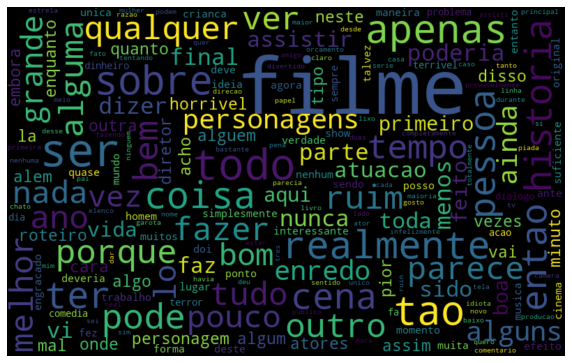

In [37]:
nuvem_palavras_neg(resenha, "tratamento_4")

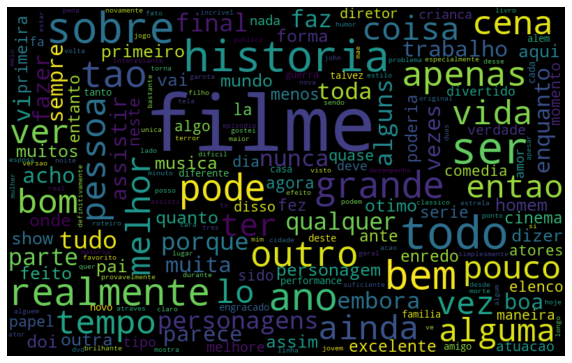

In [39]:
nuvem_palavras_pos(resenha, "tratamento_4")

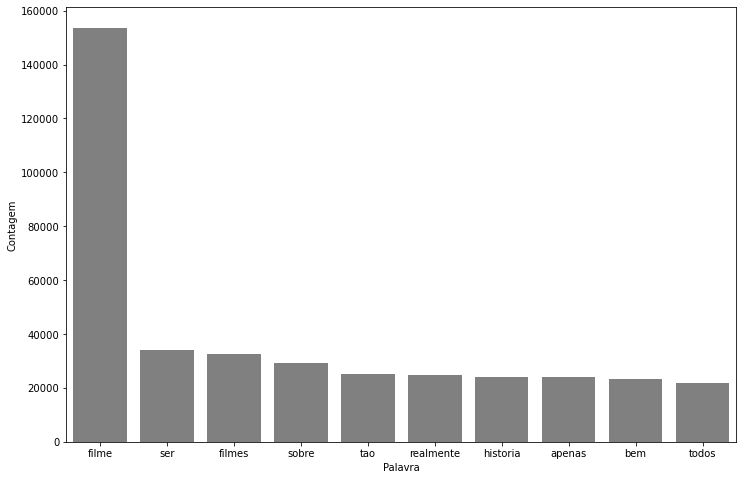

In [40]:
pareto(resenha, "tratamento_4", 10)

### Quais foram esses pré-processamentos? Qual a importância dos mesmos na análise?

Retirar a acentuação de todas as palavras e depois converteu todos os caracteres em letras minúsculas. Realizar a remoção de acentos auxilia a classificação corrigindo erros ortográficos. Por sua vez, converter as palavras em letra minúscula normaliza todos os textos, fazendo, por exemplo, com que palavras do início de frases se tornem minúsculas também.

### O que aprendemos nesta aula:

* Remover acentos com a biblioteca unidecode, para normalizar o texto.

* Modificar as stop words para remoção de acentos.

* A transformar todos os caracteres em minúsculo, normalizando o texto.

## Stemmer

RSLP(Removedor de Sufixos da Lingya Portuguesa) = Remove os sufixos transformando as palavras em radicais comuns, transformando tudo em raidcais

In [46]:
stemmer = nltk.RSLPStemmer()
stemmer.stem("corredor")
# stemmer.stem("correria")

'corr'

## Aplicando stemmer